In [3]:
import pandas as pd

veh = pd.read_pickle("Downloads/taxi_vehicles.p")
own = pd.read_pickle("Downloads/taxi_owners.p")
# Merge the taxi owners and taxi vehicles
taxi_own_veh = own.merge(veh, on= 'vid')
taxi_own_veh.columns


Index(['rid', 'vid', 'owner_x', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_y'],
      dtype='object')

In [59]:
# Merge the taxi owners and taxi vehicles with a suffixes
taxi_own_veh_s = own.merge(veh, on = 'vid', suffixes = ['_own', "_veh"])
taxi_own_veh_s.columns

# print the value counts to find the most popular fuel type
taxi_own_veh['fuel_type'].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

In [77]:
wards = pd.read_pickle('Downloads/ward.p').astype(object)
census = pd.read_pickle('Downloads/census.p').astype(object)
altered_wards = pd.read_csv('Downloads/altered_wards.csv').astype(object)
altered_census = pd.read_csv('Downloads/altered_census.csv').astype(object)

## Merge the wards and census 
wards_census = wards.merge(census, on ='ward')
wards_census.shape

altered_wards['ward'].head()

0    61
1     2
2     3
3     4
4     5
Name: ward, dtype: object

In [ ]:
## Converting to csv docs and changeed 1 1st row value

wards.to_csv(r'altered_wards.csv')
census.to_csv(r'altered_census.csv')

In [87]:
## Merge the wards and census_altered
alt_wards_census = altered_wards.merge(census, on='ward')

alt_wards_census.shape

altered_census['ward'].head()

#Merge the wards and census altered 

census_alt_wards = altered_census.merge(wards, on = 'ward')
census_alt_wards.shape

(49, 10)

## One to Many Merge

In [100]:
license = pd.read_pickle('Downloads/licenses.p')
biz_owners = pd.read_pickle('Downloads/business_owners.p')

license.head()
biz_owners.head()

,account,first_name,last_name,title
0,10,PEARL,SHERMAN,PRESIDENT
1,10,PEARL,SHERMAN,SECRETARY
2,10002,WALTER,MROZEK,PARTNER
3,10002,CELINA,BYRDAK,PARTNER
4,10005,IRENE,ROSENFELD,PRESIDENT


In [101]:
## Merge then licenses and business owners
lic_biz_own = license.merge(biz_owners, on = 'account')

## group by lic_biz_own uing titles and count the no.of accounts
counted_df = lic_biz_own.groupby('title').agg({'account':'count'})

## Sort he counted_df by descending order
sort_df = counted_df.sort_values('account', ascending = False)

sort_df.head()

,account
title,
PRESIDENT,6259
SECRETARY,5205
SOLE PROPRIETOR,1658
OTHER,1200
VICE PRESIDENT,970


## Merging multiple data frames

In [109]:
cal = pd.read_pickle('Downloads/cta_calendar.p')
ridership = pd.read_pickle('Downloads/cta_ridership.p')
stations = pd.read_pickle('Downloads/stations.p')

stations.head()

,station_id,station_name,location
0,40010,Austin-Forest Park,"(41.870851, -87.776812)"
1,40020,Harlem-Lake,"(41.886848, -87.803176)"
2,40030,Pulaski-Lake,"(41.885412, -87.725404)"
3,40040,Quincy/Wells,"(41.878723, -87.63374)"
4,40050,Davis,"(42.04771, -87.683543)"


In [110]:
cal.head()

,year,month,day,day_type
0,2019,1,1,Sunday/Holiday
1,2019,1,2,Weekday
2,2019,1,3,Weekday
3,2019,1,4,Weekday
4,2019,1,5,Saturday


In [111]:
ridership.head()

,station_id,year,month,day,rides
0,40010,2019,1,1,576
1,40010,2019,1,2,1457
2,40010,2019,1,3,1543
3,40010,2019,1,4,1621
4,40010,2019,1,5,719


In [117]:
## Merge cal and ridership on year, month, and day
cal_rider = ridership.merge(cal, on = ['year','month', 'day'])

## Merge ridership, cal, and sations
rider_cal_stations = ridership.merge(cal, on = ['year','month','day']).merge(stations, on ='station_id')
rider_cal_stations.head()



,station_id,year,month,day,rides,day_type,station_name,location
0,40010,2019,1,1,576,Sunday/Holiday,Austin-Forest Park,"(41.870851, -87.776812)"
1,40010,2019,1,2,1457,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
2,40010,2019,1,3,1543,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
3,40010,2019,1,4,1621,Weekday,Austin-Forest Park,"(41.870851, -87.776812)"
4,40010,2019,1,5,719,Saturday,Austin-Forest Park,"(41.870851, -87.776812)"


In [122]:
## create a filter to fiterickle rider_cal_stations
filter_criteria = ((rider_cal_stations['month'] == 7) & (rider_cal_stations['day_type'] == 'Weekday') & 
                   (rider_cal_stations['station_name'] == 'Wilson'))

## Use .loc and filter to select rides

rider_cal_stations.loc[filter_criteria, ['rides']].sum()

rides    140005
dtype: int64

In [125]:
zip_demo = pd.read_pickle("Downloads/zip_demo.p")
zip_demo.head()

,zip,income
0,60630,70122
1,60640,50488
2,60622,87143
3,60614,100116
4,60608,41226


In [128]:
licenses = pd.read_pickle('Downloads/licenses.p')
licenses.head()

,account,ward,aid,business,address,zip
0,307071,3,743,REGGIE'S BAR & GRILL,2105 S STATE ST,60616
1,10,10,829,HONEYBEERS,13200 S HOUSTON AVE,60633
2,10002,14,775,CELINA DELI,5089 S ARCHER AVE,60632
3,10005,12,NaN,KRAFT FOODS NORTH AMERICA,2005 W 43RD ST,60609
4,10044,44,638,NEYBOUR'S TAVERN & GRILLE,3651 N SOUTHPORT AVE,60613


In [130]:
wards = pd.read_pickle('Downloads/ward.p')
wards.head()

,ward,alderman,address,zip
0,1,"Proco ""Joe"" Moreno",2058 NORTH WESTERN AVENUE,60647
1,2,Brian Hopkins,1400 NORTH ASHLAND AVENUE,60622
2,3,Pat Dowell,5046 SOUTH STATE STREET,60609
3,4,William D. Burns,"435 EAST 35TH STREET, 1ST FLOOR",60616
4,5,Leslie A. Hairston,2325 EAST 71ST STREET,60649


In [132]:
## Merge licenses, zip_demo on zip and then with wards on ward
lic_zip_wards = licenses.merge(zip_demo, on ='zip').merge(wards, on = 'ward')

lic_zip_wards.groupby('alderman').agg({'income':'median'})

,income
alderman,
Ameya Pawar,66246.0
Anthony A. Beale,38206.0
Anthony V. Napolitano,82226.0
Ariel E. Reyboras,41307.0
Brendan Reilly,110215.0
Brian Hopkins,87143.0
Carlos Ramirez-Rosa,66246.0
Carrie M. Austin,38206.0
Chris Taliaferro,55566.0


In [142]:
land_use = pd.read_pickle('Downloads/land_use.p')

land_use.head()
land_cen_wards = land_use.merge(census, on ='ward').merge(licenses, on = 'ward', suffixes = ('_cen','_lic'))

pop_vac_lic = land_cen_wards.groupby(['ward', 'pop_2010', 'vacant'], as_index = False).agg({'account':'count'})
pop_vac_lic

,ward,pop_2010,vacant,account
0,1,56149,2,253
1,10,51535,14,130
2,11,51497,5,201
3,12,52235,4,255
4,13,53722,1,101
5,14,54031,3,202
6,15,51501,6,103
7,16,51954,13,156
8,17,51846,5,109
9,18,52992,3,124


In [144]:
sort_pop_vac_lic = pop_vac_lic.sort_values(['account', 'pop_2010', 'vacant'], ascending =[True, True, False])

sort_pop_vac_lic

,ward,pop_2010,vacant,account
47,7,51581,19,80
16,24,54909,13,98
27,34,51599,7,99
49,9,51519,6,101
4,13,53722,1,101
6,15,51501,6,103
44,5,51455,3,104
8,17,51846,5,109
43,49,54633,0,111
13,21,51632,5,123


# Merging tabels with other join types

## Left Join

In [5]:
movies = pd.read_pickle("Downloads/movies.p")
financials = pd.read_pickle("Downloads/financials.p")
movies.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [148]:
financials.head()

,id,budget,revenue
0,19995,237000000,2.787965e+09
1,285,300000000,9.610000e+08
2,206647,245000000,8.806746e+08
3,49026,250000000,1.084939e+09
4,49529,260000000,2.841391e+08


In [151]:
## Merge movies and financials by id
movie_fin = movies.merge(financials, on = 'id', how = 'left')
## find the mising values in budget column
no_mis_vals = movie_fin['budget'].isna().sum()
no_mis_vals

1574

# Enriching a dataset

In [6]:
toy_story = movies[movies['title'].str.contains('Toy Story')]
taglines = pd.read_pickle('Downloads/taglines.p')
taglines.head()

,id,tagline
0,19995,Enter the World of Pandora.
1,285,"At the end of the world, the adventure begins."
2,206647,A Plan No One Escapes
3,49026,The Legend Ends
4,49529,"Lost in our world, found in another."


In [160]:
toy_story.head()

,id,title,popularity,release_date
103,10193,Toy Story 3,59.995418,2010-06-16
2637,863,Toy Story 2,73.575118,1999-10-30
3716,862,Toy Story,73.640445,1995-10-30


In [164]:
## Merge the dataframes by id
toy_taglines = toy_story.merge(taglines, on ='id', how = 'left')
toy_taglines.shape
toy_taglines.head()

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!
2,862,Toy Story,73.640445,1995-10-30,NaN


In [165]:
## Merget the same by id using  innerjoin
toy_inr_tag = toy_story.merge(taglines, on ='id', how = 'inner')
toy_inr_tag

,id,title,popularity,release_date,tagline
0,10193,Toy Story 3,59.995418,2010-06-16,No toy gets left behind.
1,863,Toy Story 2,73.575118,1999-10-30,The toys are back!


# Other Joins

## Use other joins to find unique movies

In [13]:
movies = pd.read_pickle("Downloads/movie_to_genres.p")
sci_fi = movies[movies['genre'] == 'Science Fiction']
action = movies[movies['genre'] == 'Action']
movies

movies_1 = pd.read_pickle("Downloads/movies.p")
movies_1.head()

,id,title,popularity,release_date
0,257,Oliver Twist,20.415572,2005-09-23
1,14290,Better Luck Tomorrow,3.877036,2002-01-12
2,38365,Grown Ups,38.864027,2010-06-24
3,9672,Infamous,3.680896,2006-11-16
4,12819,Alpha and Omega,12.300789,2010-09-17


In [182]:
## Merge sci_fi and action
scifi_action_mov = action.merge(sci_fi, on ='movie_id', how = 'right', suffixes = ['_act','_sci'])
scifi_action_mov.head()

,movie_id,genre_act,genre_sci
0,11,Action,Science Fiction
1,18,Action,Science Fiction
2,19,NaN,Science Fiction
3,38,NaN,Science Fiction
4,62,NaN,Science Fiction


In [192]:
scifi_only = scifi_action_mov[scifi_action_mov['genre_act'].isnull()]
scifi_only

movies_scifi = movies_1.merge(scifi_only, how = 'inner', right_on = 'movie_id', left_on ='id')
movies_scifi.head()
movies_scifi.shape

(258, 7)

## Popular genres with right join

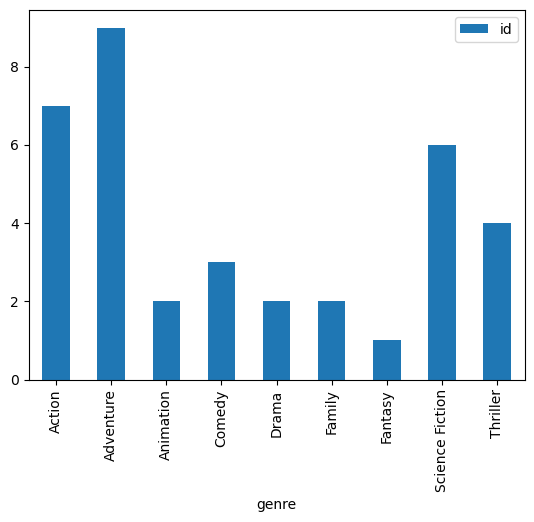

In [17]:
import matplotlib.pyplot as plt
pop_movies = pd.read_csv('Downloads/pop_movies.csv')
pop_movies.head()

genres_movies = movies.merge(pop_movies, how = 'right', left_on = 'movie_id', right_on = 'id')
genres_movies.head()

## Count the genres
genres_count = genres_movies.groupby('genre').agg({'id':'count'})

## plot genres_count
genres_count.plot(kind = 'bar')
plt.show()

## Using outerjoin to select actors

In [25]:
iron_1_actors = pd.read_csv('Downloads/iron_1_actors.csv')
iron_2_actors = pd.read_csv('Downloads/iron_2_actors.csv')

iron_1_actors.head()
iron_2_actors.head()

## Merge iron_1 and iron_2 
iron_1_2 = iron_1_actors.merge(iron_2_actors, how = 'outer', on = 'id', suffixes = ('_1','_2'))
iron_1_2.head()

## Create an index that returs true if name_1 and name_2 are null
m = (iron_1_2['name_1'].isnull()) | (iron_1_2['name_2'].isnull())
iron_1_2[m].head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,War Machine,18288,Terrence Howard,NaN,NaN
5,Raza,57452,Faran Tahir,NaN,NaN
8,Abu Bakaar,173810,Sayed Badreya,NaN,NaN


In [24]:
iron_1_2.head()

,character_1,id,name_1,character_2,name_2
0,Yinsen,17857,Shaun Toub,NaN,NaN
1,"Virginia ""Pepper"" Potts",12052,Gwyneth Paltrow,"Virginia ""Pepper"" Potts",Gwyneth Paltrow
2,Obadiah Stane / Iron Monger,1229,Jeff Bridges,NaN,NaN
3,War Machine,18288,Terrence Howard,NaN,NaN
4,Christine Everhart,57451,Leslie Bibb,Christine Everhart,Leslie Bibb


## Merging a table to itself

### Self Join

In [37]:
crews = pd.read_pickle('Downloads/crews.p')
## Merge the crews table to itself
crews_self_merged = crews.merge(crews, how = 'inner', on = 'id', suffixes = ('_dir', '_crew'))
crews_self_merged.head()

boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & (crews_self_merged['job_crew'] != 'Director'))

direct_crews= crews_self_merged[boolean_filter]
direct_crews

,id,department_dir,job_dir,name_dir,department_crew,job_crew,name_crew
156,19995,Directing,Director,James Cameron,Editing,Editor,Stephen E. Rivkin
157,19995,Directing,Director,James Cameron,Sound,Sound Designer,Christopher Boyes
158,19995,Directing,Director,James Cameron,Production,Casting,Mali Finn
160,19995,Directing,Director,James Cameron,Writing,Writer,James Cameron
161,19995,Directing,Director,James Cameron,Art,Set Designer,Richard F. Mays
...,...,...,...,...,...,...,...
834166,72766,Directing,Director,Edward Burns,Editing,Editor,Janet Gaynor
834174,231617,Directing,Director,Scott Smith,Production,Executive Producer,Scott Smith
834182,25975,Directing,Director,Brian Herzlinger,Production,Executive Producer,Clark Peterson
834186,25975,Directing,Director,Jon Gunn,Production,Executive Producer,Clark Peterson


## Merging on indexes

### Index merge for movie rating

In [42]:
ratings = pd.read_pickle('Downloads/ratings.p')

## Merge the movies with ratings
movie_ratings = movies_1.merge(ratings, how = 'left', on ='id')
movie_ratings.head()

,id,title,popularity,release_date,vote_average,vote_count
0,257,Oliver Twist,20.415572,2005-09-23,6.7,274.0
1,14290,Better Luck Tomorrow,3.877036,2002-01-12,6.5,27.0
2,38365,Grown Ups,38.864027,2010-06-24,6.0,1705.0
3,9672,Infamous,3.680896,2006-11-16,6.4,60.0
4,12819,Alpha and Omega,12.300789,2010-09-17,5.3,124.0


## Do sequels earn more?

In [49]:
sequels = pd.read_pickle('Downloads/sequels.p')
financials = pd.read_pickle('Downloads/financials.p')

## Merge the sequels and financials
seq_fin = sequels.merge(financials, how = 'left', on ='id')
seq_fin

## Merge the seq_fin to itself using id
orig_seq = seq_fin.merge(seq_fin, how = 'inner', right_on ='id', left_on = 'sequel', suffixes =('_org','_seq'))

## Add calculation to substract original_revenue and sequel_revenue
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

## Select title_org, title_seq, and diff
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]
titles_diff

,title_org,title_seq,diff
0,Toy Story,Toy Story 2,123812836.0
1,Toy Story 2,Toy Story 3,569602834.0
2,Harry Potter and the Order of the Phoenix,Harry Potter and the Half-Blood Prince,-4253541.0
3,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Return of the King,192601579.0
4,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Two Towers,54919036.0
...,...,...,...
85,Before Sunrise,Before Sunset,10457210.0
86,Clerks,Clerks II,23737246.0
87,El Mariachi,Desperado,23364525.0
88,The Boondock Saints,The Boondock Saints II: All Saints Day,10598850.0


# Advanced Merging and concatenating

## Filtering Joins

### Performing an anti-join

In [59]:
employees = pd.read_csv("Downloads/employees.csv")
top_cust = pd.read_csv("Downloads/top_cust.csv")

empl_cust = employees.merge(top_cust, how ='left', on ='srid', indicator = True)


srid_list = empl_cust.loc[empl_cust['_merge'] == 'left_only', 'srid']

employees[employees['srid'].isin(srid_list)]


,srid,lname,fname,title hire_date,email
0,1,Adams,Andrew,General Manager 2002-08-14,andrew@chinookcorp.com
1,2,Edwards,cy,Sales Manager 2002-05-01,cy@chinookcorp.com
5,6,Mitchell,Michael,IT Manager 2003-10-17,michael@chinookcorp.com
6,7,King,Robert,IT Staff 2004-01-02,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff 2004-03-04,laura@chinookcorp.com


In [56]:
empl_cust

,srid,lname_x,fname_x,title hire_date,email_x,cid,fname_y,lname_y,phone,fax,email_y,_merge
0,1,Adams,Andrew,General Manager 2002-08-14,andrew@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,2,Edwards,cy,Sales Manager 2002-05-01,cy@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,1.0,Luís,Gonçalves,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,both
3,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,3.0,François,Tremblay,+1 (514) 721-4711,NaN,ftremblay@gmail.com,both
4,3,Peacock,Jane,Sales Support Agent 2002-04-01,jane@chinookcorp.com,12.0,Roberto,Almeida,+55 (21) 2271-7000,+55 (21) 2271-7070,roberto.almeida@riotur.gov.br,both
...,...,...,...,...,...,...,...,...,...,...,...,...
59,5,Johnson,Steve,Sales Support Agent 2003-10-17,steve@chinookcorp.com,54.0,Steve,Murray,+44 0131 315 3300,NaN,steve.murray@yahoo.uk,both
60,5,Johnson,Steve,Sales Support Agent 2003-10-17,steve@chinookcorp.com,57.0,Luis,Rojas,+56 (0)2 635 4444,NaN,luisrojas@yahoo.cl,both
61,6,Mitchell,Michael,IT Manager 2003-10-17,michael@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only
62,7,King,Robert,IT Staff 2004-01-02,robert@chinookcorp.com,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [61]:
## Performing a semi join
non_mus_tcks = pd.read_csv('Downloads/non_mus_tcks.csv')
non_mus_tcks

,tid,name,aid,mtid,gid,u_price
0,2820,Occupation / Precipice,227,3,19,1.99
1,2821,"Exodus, Pt. 1",227,3,19,1.99
2,2822,"Exodus, Pt. 2",227,3,19,1.99
3,2823,Collaborators,227,3,19,1.99
4,2824,Torn,227,3,19,1.99
...,...,...,...,...,...,...
195,3362,"There\'s No Place Like Home, Pt. 1",261,3,21,1.99
196,3363,"There\'s No Place Like Home, Pt. 2",261,3,21,1.99
197,3364,"There\'s No Place Like Home, Pt. 3",261,3,21,1.99
198,3428,Branch Closing,251,3,22,1.99


In [62]:
top_invoices = pd.read_csv('Downloads/top_invoices.csv')
top_invoices

,ilid,iid,tid,uprice,quantity
0,470,88,2832,1.99,1
1,473,88,2850,1.99,1
2,476,88,2868,1.99,1
3,527,96,3214,1.99,1
4,528,96,3223,1.99,1
5,533,99,3250,1.99,1
6,1098,201,3200,1.99,1
7,1100,202,3223,1.99,1
8,1668,306,3177,1.99,1
9,1670,307,3200,1.99,1


In [65]:
genres  = pd.read_csv('Downloads/genres.csv')
genres

,gid
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [70]:
track_invoices = non_mus_tcks.merge(top_invoices, on = 'tid')
track_invoices

top_tracks = non_mus_tcks.loc[non_mus_tcks['tid'].isin(track_invoices['tid'])]

cnt_by_gid = top_tracks.groupby('gid', as_index=False).agg({'tid':'count'})
cnt_by_gid

,gid,tid
0,19,4
1,21,2
2,22,1


# Concatenate dataframes vertically 

## Concatenation basics

In [3]:
import pandas as pd
tracks_master = pd.read_csv('Downloads/tracks_master.csv')
tracks_ride = pd.read_csv('Downloads/tracks_ride.csv')
tracks_rt = pd.read_csv("Downloads/tracks_st.csv")

## Concatenate the tracks
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_rt], sort = True)
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99
2,155,3,1,Some Kind Of Monster,1884,0.99
3,155,3,1,Dirty Window,1885,0.99
4,155,3,1,Invisible Kid,1886,0.90
0,154,3,1,Fight Fire With Fire,1874,0.99
1,154,3,1,Ride The Lightning,1875,0.99
2,154,3,1,For Whom The Bell Tolls,1876,0.99
3,154,3,1,Fade To Black,1877,0.99
4,154,3,1,Trapped Under Ice,1878,0.99


In [9]:
## Concatenate the tracks so that index goes from 0 to n-1
tracks_from_albums = pd.concat([tracks_master, tracks_ride, tracks_rt], sort= True, ignore_index = True)
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99
2,155,3,1,Some Kind Of Monster,1884,0.99
3,155,3,1,Dirty Window,1885,0.99
4,155,3,1,Invisible Kid,1886,0.90
5,154,3,1,Fight Fire With Fire,1874,0.99
6,154,3,1,Ride The Lightning,1875,0.99
7,154,3,1,For Whom The Bell Tolls,1876,0.99
8,154,3,1,Fade To Black,1877,0.99
9,154,3,1,Trapped Under Ice,1878,0.99


In [11]:
## Concatenate the tracks , showing all columns in all tables
tracks_from_albumns = pd.concat([tracks_master, tracks_ride, tracks_rt], join = 'inner', sort = True)
tracks_from_albums

,aid,gid,mtid,name,tid,u_price
0,155,3,1,Frantic,1882,0.99
1,155,3,1,St. Anger,1883,0.99
2,155,3,1,Some Kind Of Monster,1884,0.99
3,155,3,1,Dirty Window,1885,0.99
4,155,3,1,Invisible Kid,1886,0.90
5,154,3,1,Fight Fire With Fire,1874,0.99
6,154,3,1,Ride The Lightning,1875,0.99
7,154,3,1,For Whom The Bell Tolls,1876,0.99
8,154,3,1,Fade To Black,1877,0.99
9,154,3,1,Trapped Under Ice,1878,0.99


## Concatenating with keys

In [13]:
inv_jul = pd.read_csv("Downloads/inv_jul.csv")
inv_aug = pd.read_csv("Downloads/inv_aug.csv")
inv_sep = pd.read_csv("Downloads/inv_sep.csv") 

In [15]:
inv_jul.head()

,iid,cid,invoice_date,total,bill_ctry
0,42,51,40000,1.98,Sweden
1,43,53,40000,1.98,UK
2,44,55,40001,3.96,Australia
3,45,59,40002,5.94,India
4,46,6,40005,8.91,Czech Republic


In [16]:
inv_aug.head()

,iid,cid,invoice_date,total,bill_ctry
0,49,30,40031,1.98,Canada
1,50,32,40031,1.98,Canada
2,51,34,40032,3.96,Portugal
3,52,38,40033,5.94,Germany
4,53,44,40036,8.91,Finland


In [17]:
inv_sep.head()

,iid,cid,invoice_date,total,bill_ctry
0,56,9,40062,1.98,Denmark
1,57,11,40062,1.98,Brazil
2,58,13,40063,3.96,Brazil
3,59,17,40064,5.94,USA
4,60,23,40067,8.91,USA


In [19]:
## Concatenate the tables and add keys
inv_jul_aug_sep = pd.concat([inv_jul, inv_aug, inv_sep], keys = ['7jul', '8aug', '9sep'])
inv_jul_aug_sep

iid  cid  invoice_date  total       bill_ctry
7jul 0    42   51         40000   1.98          Sweden
     1    43   53         40000   1.98              UK
     2    44   55         40001   3.96       Australia
     3    45   59         40002   5.94           India
     4    46    6         40005   8.91  Czech Republic
...      ...  ...           ...    ...             ...
9sep 28  387   29         41520   3.96          Canada
     29  388   33         41521   5.94          Canada
     30  389   39         41524   8.91          France
     31  390   48         41529  13.86     Netherlands
     32  391    3         41537   0.99          Canada

[103 rows x 5 columns]

<Axes: >

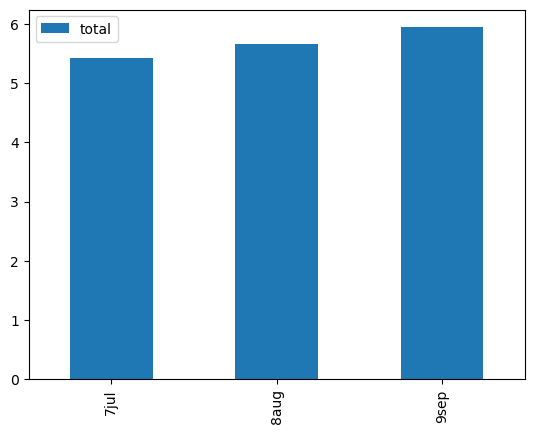

In [24]:
avg_inv = inv_jul_aug_sep.groupby(level = 0).agg({'total':'mean'})

import matplotlib.pyplot as plt
avg_inv.plot(kind = 'bar')

In [27]:
## Cancatenating and merging to find common songs
classic_18 = pd.read_csv('Downloads/classic_18.csv')
classic_19 = pd.read_csv('Downloads/classic_19.csv')
pop_18 = pd.read_csv('Downloads/pop_18.csv')
pop_19 = pd.read_csv('Downloads/pop_19.csv')

## Concatenate the classic_18_19 and pop_18_19
classic_18_19 = pd.concat([classic_18, classic_19], ignore_index = True)
pop_18_19 = pd.concat([pop_18, pop_19], ignore_index = True)



In [29]:
classic_18_19.head()

,pid,tid
0,12,3483
1,12,3416
2,12,3489
3,12,3479
4,12,3440


In [30]:
pop_18_19.head()

,pid,tid
0,1,3063
1,1,2712
2,1,2641
3,1,2271
4,1,919


In [36]:
## Merging classic_18_19 and pop_18_19

classic_pop = classic_18_19.merge(pop_18_19, on = 'tid')
classic_pop

## Use .isin() to filter classic_18_19 on tid from classic_pop
popular_classic = classic_18_19[classic_18_19['tid'].isin(classic_pop['tid'])]
popular_classic

,pid,tid
3,12,3479
10,12,3439
21,12,3445
23,12,3449
48,12,3437
50,12,3435


## Using Merge_ordered

In [42]:
gdp = pd.read_csv('Downloads/gdp1.csv')
gdp.columns = gdp.columns.str.lower()
SP500 = pd.read_csv("Downloads/S&P500.csv")
SP500.cloumns = SP500.columns.str.lower()

C:\Users\Ravi\AppData\Local\Temp\ipykernel_10488\1218765575.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  SP500.cloumns = SP500.columns.str.lower()


In [43]:
gdp.head()

,country name,country code,indicator name,year,gdp
0,China,CHN,GDP (current US$),2010,6.087160e+12
1,Germany,DEU,GDP (current US$),2010,3.417090e+12
2,Japan,JPN,GDP (current US$),2010,5.700100e+12
3,United States,USA,GDP (current US$),2010,1.499210e+13
4,China,CHN,GDP (current US$),2011,7.551500e+12


In [44]:
SP500.head()

,Date,Returns
0,2008,-38.49
1,2009,23.45
2,2010,12.78
3,2011,0.00
4,2012,13.41


In [48]:
gdp_SP500 = pd.merge_ordered(gdp, SP500, how ='left', left_on = 'year', right_on ='Date')
gdp_SP500

gdp_SP500 = pd.merge_ordered(gdp, SP500, how = 'left', left_on='year', right_on ='Date', fill_method = 'ffill')
gdp_SP500

,country name,country code,indicator name,year,gdp,Date,Returns
0,China,CHN,GDP (current US$),2010,6.087160e+12,2010,12.78
1,Germany,DEU,GDP (current US$),2010,3.417090e+12,2010,12.78
2,Japan,JPN,GDP (current US$),2010,5.700100e+12,2010,12.78
3,United States,USA,GDP (current US$),2010,1.499210e+13,2010,12.78
4,China,CHN,GDP (current US$),2011,7.551500e+12,2011,0.00
5,Germany,DEU,GDP (current US$),2011,3.757700e+12,2011,0.00
6,Japan,JPN,GDP (current US$),2011,6.157460e+12,2011,0.00
7,United States,USA,GDP (current US$),2011,1.554260e+13,2011,0.00
8,China,CHN,GDP (current US$),2012,8.532230e+12,2012,13.41
9,Germany,DEU,GDP (current US$),2012,3.543980e+12,2012,13.41


In [52]:
gdp_returns = gdp_SP500[['gdp', 'Returns']]

gdp_returns_f = gdp_returns.astype(float)

## Correlation of gdp and returns
print(gdp_returns_f.corr())

              gdp   Returns
gdp      1.000000  0.040669
Returns  0.040669  1.000000


In [2]:
import pandas as pd
## Philips cusrve using merge ordered
inflation = pd.read_csv("Downloads/inflation.csv")
unemployment = pd.read_csv("Downloads/unemployment.csv")

inflation.head()

,date,cpi,seriesid,data_type
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
1,2014-02-01,235.547,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
2,2014-03-01,236.028,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
3,2014-04-01,236.468,CUSR0000SA0,SEASONALLY ADJUSTED INDEX
4,2014-05-01,236.918,CUSR0000SA0,SEASONALLY ADJUSTED INDEX


In [56]:
unemployment.head()

,date,unemployment_rate
0,2013-06-01,7.5
1,2014-01-01,6.7
2,2014-06-01,6.1
3,2015-01-01,5.6
4,2015-06-01,5.3


In [3]:
inf_unt = pd.merge_ordered(inflation, unemployment, how= 'inner', on ='date')
inf_unt.head()

,date,cpi,seriesid,data_type,unemployment_rate
0,2014-01-01,235.288,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.7
1,2014-06-01,237.231,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,6.1
2,2015-01-01,234.718,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.6
3,2015-06-01,237.684,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.3
4,2016-01-01,237.833,CUSR0000SA0,SEASONALLY ADJUSTED INDEX,5.0


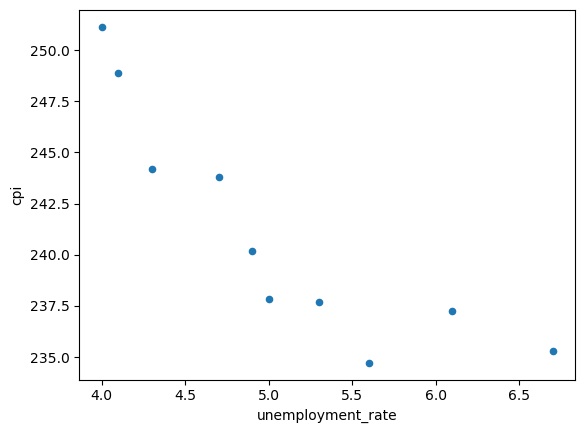

In [5]:
import matplotlib.pyplot as plt

inf_unt.plot(kind = 'scatter', x = 'unemployment_rate', y = 'cpi')
plt.show()

In [13]:
gdp_1 = pd.read_csv("Downloads/gdp2.csv")
pop_1 = pd.read_csv("Downloads/pop1.csv")

gdp_1.head()

,date,country,gdp,series_code
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD
1,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD
2,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD
3,1990-09-01,Australia,158240.678,NYGDPMKTPSAKD
4,1991-01-01,Australia,156195.954,NYGDPMKTPSAKD


In [11]:
pop_1.head()

,date,country,pop,series_code
0,1990-01-01,Australia,17065100,SP.POP.TOTL
1,1991-01-01,Australia,17284000,SP.POP.TOTL
2,1992-01-01,Australia,17495000,SP.POP.TOTL
3,1993-01-01,Australia,17667000,SP.POP.TOTL
4,1990-01-01,Sweden,8558835,SP.POP.TOTL


In [18]:
ctray_date = pd.merge_ordered(gdp_1, pop_1, on =['country', 'date'], fill_method = 'ffill')
ctray_date

date_ctray = pd.merge_ordered(gdp_1, pop_1, on =['date','country'], fill_method ='ffill')
date_ctray

,date,country,gdp,series_code_x,pop,series_code_y
0,1990-01-01,Australia,158051.132,NYGDPMKTPSAKD,17065100,SP.POP.TOTL
1,1990-01-01,Sweden,79837.846,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
2,1990-04-01,Australia,158263.582,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
3,1990-04-01,Sweden,80582.286,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
4,1990-07-01,Australia,157329.279,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
5,1990-07-01,Sweden,79974.360,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
6,1990-09-01,Australia,158240.678,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
7,1990-09-01,Sweden,80106.497,NYGDPMKTPSAKD,8558835,SP.POP.TOTL
8,1991-01-01,Australia,156195.954,NYGDPMKTPSAKD,17284000,SP.POP.TOTL
9,1991-01-01,Sweden,79524.242,NYGDPMKTPSAKD,8617375,SP.POP.TOTL


# Using merge_asof

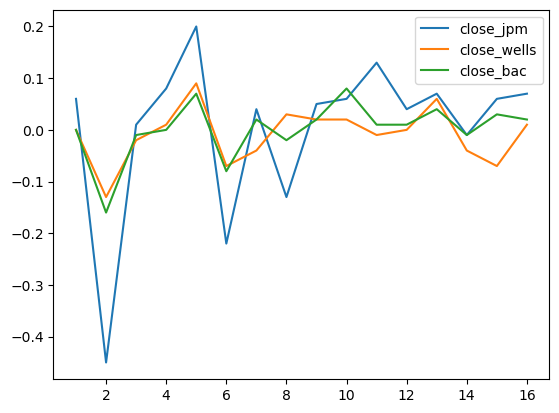

In [38]:
jpm = pd.read_csv('Downloads/jpm.csv')
jpm["date_time"] = pd.to_datetime(jpm["date_time"])
wells = pd.read_csv('Downloads/wells.csv')
wells["date_time"] = pd.to_datetime(wells["date_time"])
bac = pd.read_csv('Downloads/bac.csv')
bac["date_time"] = pd.to_datetime(bac["date_time"])

# Use merge_asof() to merge jpm and wells
jpm_wells = pd.merge_asof(jpm, wells, on='date_time', 
                          suffixes=('', '_wells'), direction='nearest')

# Use merge_asof() to merge jpm_wells and bac
jpm_wells_bac = pd.merge_asof(jpm_wells, bac, on='date_time', 
                              suffixes=('_jpm', '_bac'), direction='nearest')

# Compute price diff
price_diffs = jpm_wells_bac.diff()

# Plot the price diff of the close of jpm, wells and bac only
price_diffs.plot(y=['close_jpm','close_wells','close_bac'])
plt.show()


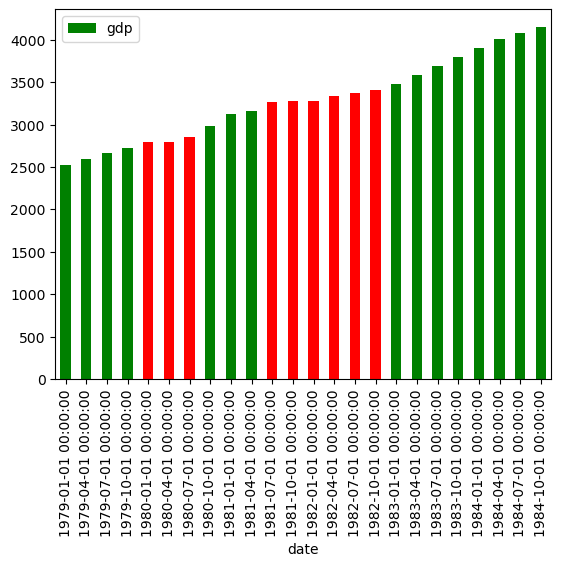

In [50]:
gdp3 = pd.read_csv('Downloads/gdp3.csv')
gdp3['date'] = pd.to_datetime(gdp3['date'])
recession = pd.read_csv('Downloads/recession.csv')
recession['date'] = pd.to_datetime(recession['date'])

gdp_recession = pd.merge_asof(gdp3, recession, on = 'date')
gdp_recession.head()

is_recession = ['r' if s == 'recession' else 'g' for s in gdp_recession['econ_status']]

gdp_recession.plot(kind = 'bar', y ='gdp', x ='date', color = is_recession, rot =90)
plt.show()

## Selecting data with .query()

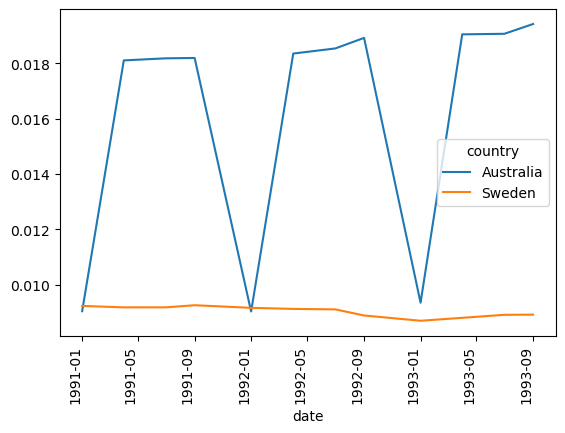

In [62]:
gdp2 = pd.read_csv('Downloads/gdp4.csv')
gdp2['date'] = pd.to_datetime(gdp2['date'])
pop = pd.read_csv('Downloads/pop2.csv')
pop['date'] = pd.to_datetime(pop['date'])

gdp_pop = pd.merge_ordered(gdp2, pop, on = ['date', 'country'], fill_method = 'ffill')

gdp_pop['gdp_per_capita'] = gdp_pop['gdp']/gdp_pop['pop']

gdp_pivot = gdp_pop.pivot_table('gdp_per_capita', 'date', 'country')

recent_gdp_pop = gdp_pivot.query('date >= "1991-01-01"')
recent_gdp_pop.plot(rot = 90)
plt.show()

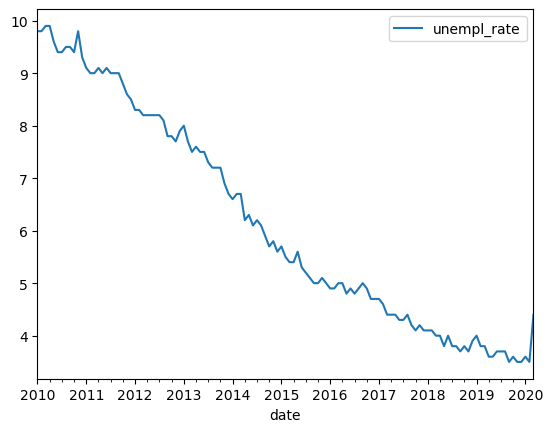

In [76]:
## Use .melt to reshape the government data
ur_wide = pd.read_csv('Downloads/ur_wide.csv')

ur_tall = ur_wide.melt(id_vars = ['year'], var_name = 'month', value_name = 'unempl_rate')

ur_tall = ur_tall[ur_tall['unempl_rate'] != 'nan'].dropna().astype(str)

ur_tall['date'] = pd.to_datetime(ur_tall['month'] + '-'+ ur_tall['year'])

un_sort = ur_tall.sort_values('date')

un_sort['unempl_rate'] = pd.to_numeric(un_sort['unempl_rate'])
un_sort.head()

un_sort.plot(x = 'date', y = 'unempl_rate')
plt.show()

In [77]:
ur_wide

,year,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
0,2010,9.8,9.8,9.9,9.9,9.6,9.4,9.4,9.5,9.5,9.4,9.8,9.3
1,2011,9.1,9.0,9.0,9.1,9.0,9.1,9.0,9.0,9.0,8.8,8.6,8.5
2,2012,8.3,8.3,8.2,8.2,8.2,8.2,8.2,8.1,7.8,7.8,7.7,7.9
3,2013,8.0,7.7,7.5,7.6,7.5,7.5,7.3,7.2,7.2,7.2,6.9,6.7
4,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
5,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
6,2016,4.9,4.9,5.0,5.0,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
7,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.2,4.1,4.2,4.1
8,2018,4.1,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.7,3.9
9,2019,4.0,3.8,3.8,3.6,3.6,3.7,3.7,3.7,3.5,3.6,3.5,3.5


In [78]:
ur_tall

,year,month,unempl_rate,date
0,2010,jan,9.8,2010-01-01
1,2011,jan,9.1,2011-01-01
2,2012,jan,8.3,2012-01-01
3,2013,jan,8.0,2013-01-01
4,2014,jan,6.6,2014-01-01
...,...,...,...,...
126,2015,dec,5.0,2015-12-01
127,2016,dec,4.7,2016-12-01
128,2017,dec,4.1,2017-12-01
129,2018,dec,3.9,2018-12-01


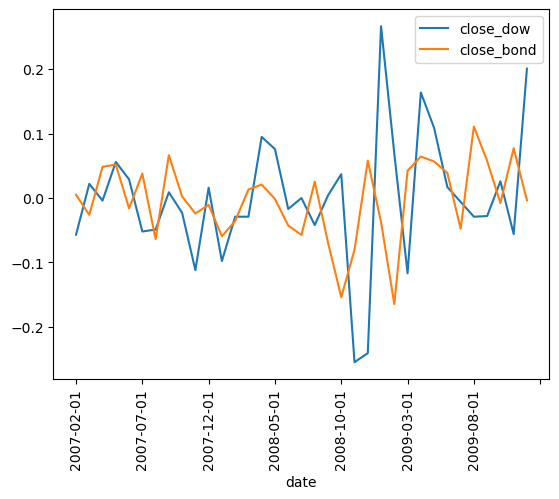

In [87]:
ten_yr = pd.read_csv("Downloads/ten_yr.csv")
dji = pd.read_csv("Downloads/dji.csv")

bond_perc = ten_yr.melt(id_vars = 'metric', var_name ='date', value_name = 'close')

bond_perc_close = bond_perc.query('metric == "close"')

dow_bond = pd.merge_ordered(bond_perc_close, dji, on = 'date', how = 'inner', suffixes = ('_dow', '_bond'))

dow_bond.plot(y = ['close_dow', 'close_bond'], x ='date', rot =90)
plt.show()